# Exp 2: Image Intensity Transformations and Spatial Filtering #
## 1.	Aims ##

#### 1. Learn the method of contrast adjustment and histogram equalization.

#### 2. Learn how to display histograms of images.
    
#### 3. Learn how to perform spatial filtering.

## 2.	Steps and Requirements

### (1) Perform Contrast Adjustment.	
(a) Load the image 'beans.png'. 

(b) Stretch its graysacle to the range of [0,1]. (Tips: ``skimage.exposure.rescale_intensity``) 

(c) Shrink its grayscale to the range of [0.25,0.75]. (Tips: ``skimage.exposure.rescale_intensity``) 

(d) Obtain the negative image. (Tips: ``skimage.exposure.rescale_intensity``) 

(e) Perform log transformation. (Tips: ``skimage.exposure.adjust_log``)  

(f) Perform Gamma transformation with $\gamma=0.2$ and $\gamma=1.2$, respectively. (Tips: ``skimage.exposure.adjust_gamma``) 

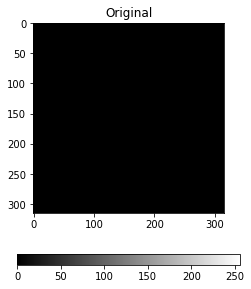

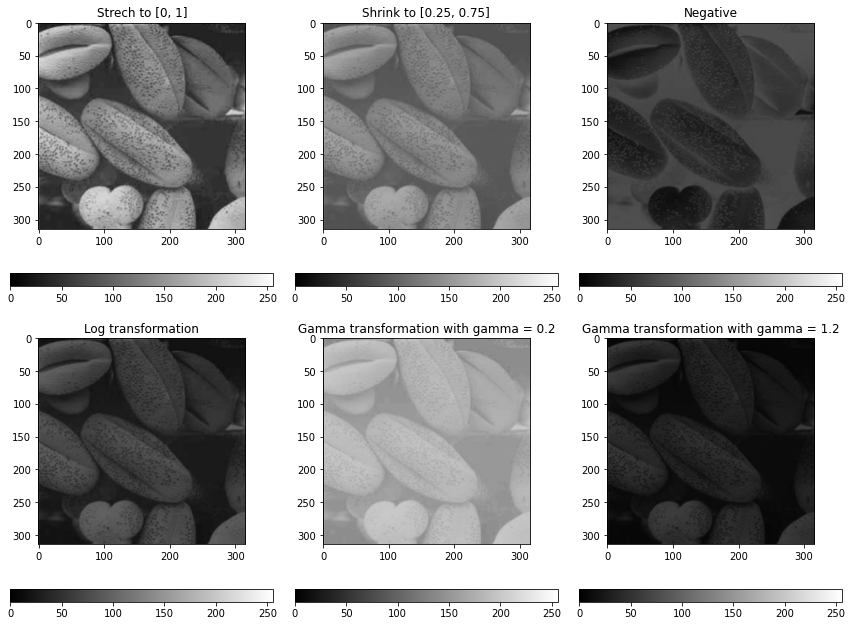

In [1]:
from skimage import io, color, img_as_ubyte, exposure
import matplotlib.pyplot as plt

img1 = io.imread('./images/beans.png')
img1 = color.rgb2gray(img1)

# Original
plt.figure(figsize = [4, 5])
plt.imshow(img1, cmap = 'gray', vmin = 0, vmax = 256)
plt.colorbar(orientation = 'horizontal')
plt.title('Original')
plt.show()

# Strech
strech = exposure.rescale_intensity(img1, out_range = (0, 1))
strech = img_as_ubyte(strech)
plt.figure(figsize = [12, 9])
plt.subplot(2, 3, 1)
plt.imshow(strech, cmap = 'gray', vmin = 0, vmax = 256)
plt.colorbar(orientation = 'horizontal')
plt.title('Strech to [0, 1]')

# Shrink
shrink = exposure.rescale_intensity(img1, out_range = (0.25, 0.75))
shrink = img_as_ubyte(shrink)
plt.subplot(2, 3, 2)
plt.imshow(shrink, cmap = 'gray', vmin = 0, vmax = 256)
plt.colorbar(orientation = 'horizontal')
plt.title('Shrink to [0.25, 0.75]')

# Negative
negative = exposure.rescale_intensity(img1, out_range = (img1.max(),img1.min()))
negative = img_as_ubyte(negative)
plt.subplot(2, 3, 3)
plt.imshow(negative, cmap = 'gray', vmin = 0, vmax = 256)
plt.colorbar(orientation = 'horizontal')
plt.title('Negative')

# Log transformation
log = exposure.adjust_log(img1)
log = img_as_ubyte(log)
plt.subplot(2, 3, 4)
plt.imshow(log, cmap = 'gray', vmin = 0, vmax = 256)
plt.colorbar(orientation = 'horizontal')
plt.title('Log transformation')

# Gamma transformation
gamma1 = exposure.adjust_gamma(img1, gamma = 0.2)
gamma1 = img_as_ubyte(gamma1)
gamma2 = exposure.adjust_gamma(img1, gamma = 1.2)
gamma2 = img_as_ubyte(gamma2)
plt.subplot(2, 3, 5)
plt.imshow(gamma1, cmap = 'gray', vmin = 0, vmax = 256)
plt.colorbar(orientation = 'horizontal')
plt.title('Gamma transformation with gamma = 0.2')
plt.subplot(2, 3, 6)
plt.imshow(gamma2, cmap = 'gray', vmin = 0, vmax = 256)
plt.colorbar(orientation = 'horizontal')
plt.title('Gamma transformation with gamma = 1.2')
plt.tight_layout()
plt.show()

### (2) Compute and Display Image Histogram.	
(a) Compute the histogram of the original image and the histograms of the adjusted images above.
(<font style="color:red;"> Tips:``Matplotlib.pyplot.hist``or ``skimage.exposure.histogram(image, nbins=256)``</font>) 

(b) Display the histogram of the original image and the histograms of the adjusted images above. Use a suitlabe title for each figure.


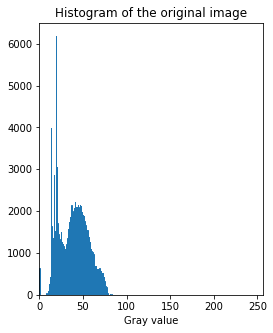

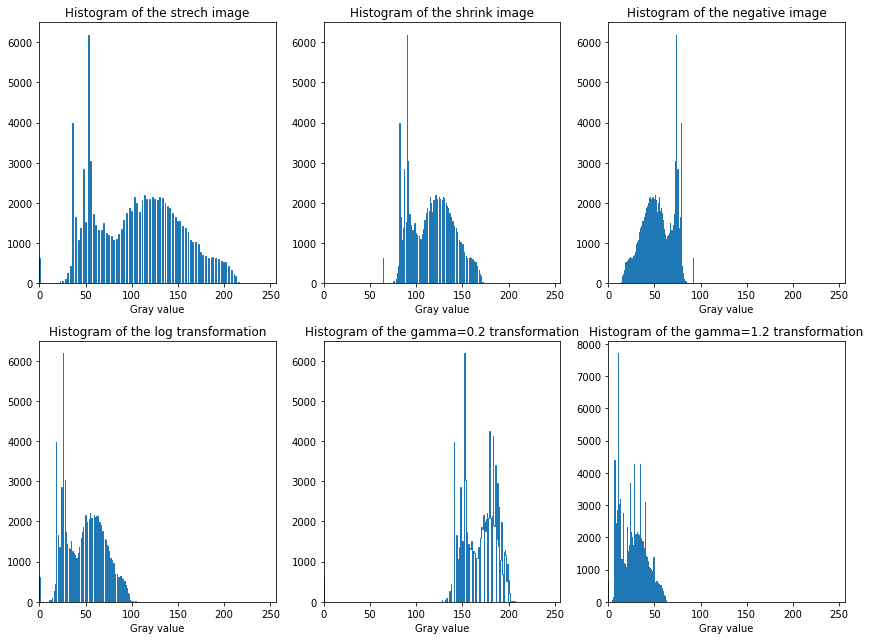

In [2]:
# Original
img1 = img_as_ubyte(img1)
plt.figure(figsize = [4, 5])
plt.hist(img1.ravel(), bins = 256, histtype = 'step')
plt.xlim(0, 256)
plt.xlabel('Gray value')
plt.title('Histogram of the original image')
plt.show()

# Strech
plt.figure(figsize = [12, 9])
plt.subplot(2, 3, 1)
plt.hist(strech.ravel(), bins = 256, histtype = 'step')
plt.xlabel('Gray value')
plt.xlim(0, 256)
plt.title('Histogram of the strech image')

# Shrink
plt.subplot(2, 3, 2)
plt.hist(shrink.ravel(), bins = 256, histtype = 'step')
plt.xlabel('Gray value')
plt.xlim(0, 256)
plt.title('Histogram of the shrink image')

# Negative
plt.subplot(2, 3, 3)
plt.hist(negative.ravel(), bins = 256, histtype = 'step')
plt.xlabel('Gray value')
plt.xlim(0, 256)
plt.title('Histogram of the negative image')

# Log transformation
plt.subplot(2, 3, 4)
plt.hist(log.ravel(), bins = 256, histtype = 'step')
plt.xlabel('Gray value')
plt.xlim(0, 256)
plt.title('Histogram of the log transformation')

# Gamma transformation
plt.subplot(2, 3, 5)
plt.hist(gamma1.ravel(), bins = 256, histtype = 'step')
plt.xlabel('Gray value')
plt.xlim(0, 256)
plt.title('Histogram of the gamma=0.2 transformation')
plt.subplot(2, 3, 6)
plt.hist(gamma2.ravel(), bins = 256, histtype = 'step')
plt.xlabel('Gray value')
plt.xlim(0, 256)
plt.title('Histogram of the gamma=1.2 transformation')
plt.tight_layout()
plt.show()

### (3) Image Histogram Equalization 	
(a) Load the image 'beans.png'.  

(b) Perform histogram equalization of the image. (Tips: ``skimage.exposure.equalize_hist``) 

(c) Display the original image, the equalized image, the histogram of the original image, and the equalized image.  

(d) Answer the question: What are their differences?


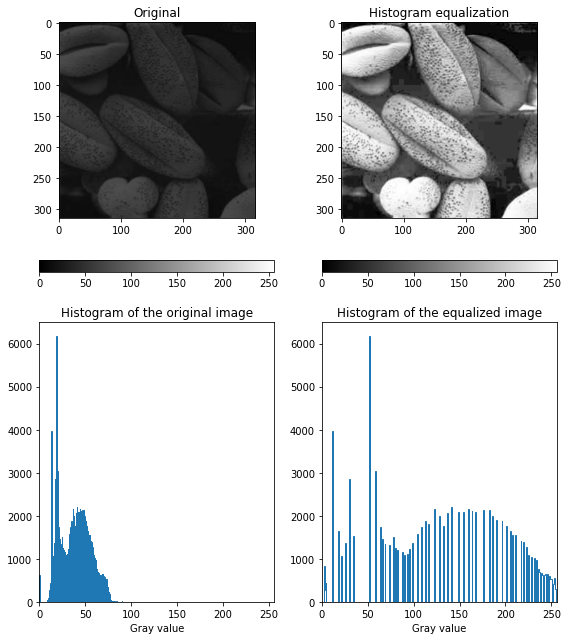

In [3]:
img2 = io.imread('./images/beans.png')
img2 = color.rgb2gray(img2)

# Histogram equalization
img2_eq = exposure.equalize_hist(img2)

img2 = img_as_ubyte(img2)
img2_eq = img_as_ubyte(img2_eq)

plt.figure(figsize = [8, 9])
plt.subplot(2, 2, 1)
plt.imshow(img2, cmap = 'gray', vmin = 0, vmax = 256)
plt.colorbar(orientation = 'horizontal')
plt.title('Original')
plt.subplot(2, 2, 2)
plt.imshow(img2_eq, cmap = 'gray', vmin = 0, vmax = 256)
plt.colorbar(orientation = 'horizontal')
plt.title('Histogram equalization')

plt.subplot(2, 2, 3)
plt.hist(img2.ravel(), bins = 256, histtype = 'step')
plt.xlabel('Gray value')
plt.xlim(0, 256)
plt.title('Histogram of the original image')
plt.subplot(2, 2, 4)
plt.hist(img2_eq.ravel(), bins = 256, histtype = 'step')
plt.xlabel('Gray value')
plt.xlim(0, 256)
plt.title('Histogram of the equalized image')
plt.tight_layout()
plt.show()

### (4) Smoothing Linear Filtering.	
(a) Load the image 'mandrill.jpg'. 

(b) Add salt&Pepper noise with different intensities (at least 3 kinds). (Tips: ``skimage.util.random_noise``) 

(c) Perform smoothing linear filtering to smooth these noised images respectively. (Tips: ``ImageFilter.BLUR``) 

(d) Display the images in the same figure with sub-figures. Add the corresponding title to each sub-figure.

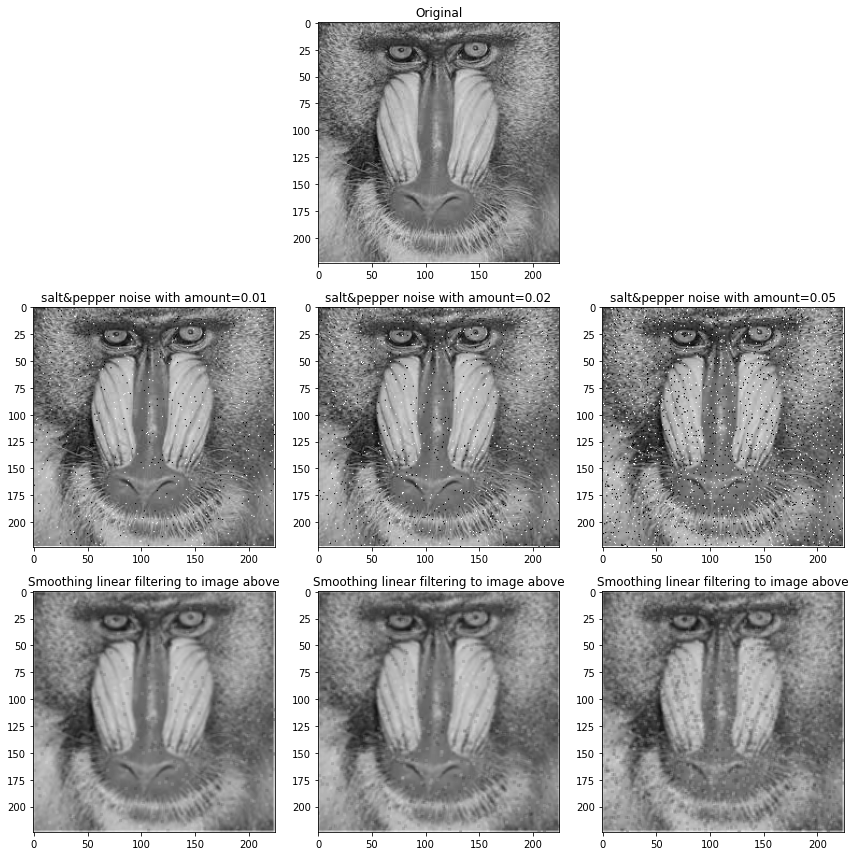

In [4]:
from skimage import img_as_float, util
from PIL import Image, ImageFilter

img3 = io.imread('./images/mandrill.jpg')
img3 = color.rgb2gray(img3)
img3 = img_as_float(img3)

# Add salt and pepper noise and convert to PIL object
img3_sp_1 = util.random_noise(img3, mode = 's&p', amount=0.01, salt_vs_pepper=0.5)
img3_sp_2 = util.random_noise(img3, mode = 's&p', amount=0.02, salt_vs_pepper=0.5)
img3_sp_3 = util.random_noise(img3, mode = 's&p', amount=0.05, salt_vs_pepper=0.5)
img3 = Image.fromarray(img_as_ubyte(img3))
img3_sp_1 = Image.fromarray(img_as_ubyte(img3_sp_1))
img3_sp_2 = Image.fromarray(img_as_ubyte(img3_sp_2))
img3_sp_3 = Image.fromarray(img_as_ubyte(img3_sp_3))

# Smoothing linear filtering
img3_blur_1 = img3_sp_1.filter(ImageFilter.BoxBlur(1))
img3_blur_2 = img3_sp_2.filter(ImageFilter.BoxBlur(1))
img3_blur_3 = img3_sp_3.filter(ImageFilter.BoxBlur(1))

# Plot
plt.figure(figsize=[12, 12])
plt.subplot(3, 3, 2)
plt.imshow(img3, vmin=0, vmax=255, cmap='gray')
plt.title('Original')
plt.subplot(3, 3, 4)
plt.imshow(img3_sp_1, vmin=0, vmax=255, cmap='gray')
plt.title('salt&pepper noise with amount=0.01')
plt.subplot(3, 3, 5)
plt.imshow(img3_sp_2, vmin=0, vmax=255, cmap='gray')
plt.title('salt&pepper noise with amount=0.02')
plt.subplot(3, 3, 6)
plt.imshow(img3_sp_3, vmin=0, vmax=255, cmap='gray')
plt.title('salt&pepper noise with amount=0.05')
plt.subplot(3, 3, 7)
plt.imshow(img3_blur_1, vmin=0, vmax=255, cmap='gray')
plt.title('Smoothing linear filtering to image above')
plt.subplot(3, 3, 8)
plt.imshow(img3_blur_2, vmin=0, vmax=255, cmap='gray')
plt.title('Smoothing linear filtering to image above')
plt.subplot(3, 3, 9)
plt.imshow(img3_blur_3, vmin=0, vmax=255, cmap='gray')
plt.title('Smoothing linear filtering to image above')
plt.tight_layout()
plt.show()

### (5) Gaussian Smoothing Filtering.	
(a) Load the image 'mandrill.jpg'. 

(b) Add salt and pepper noise to image. (Tips: ``skimage.util.random_noise``) 

(c) Perform Gaussian Smoothing Filtering to smooth the noised image. Select kernels with different radius values (at least 3 kinds). (Tips: ``ImageFilter. GaussianBlur``) 

(d) Display the images in the same figure with sub-figures. Add the corresponding title to each sub-figure.

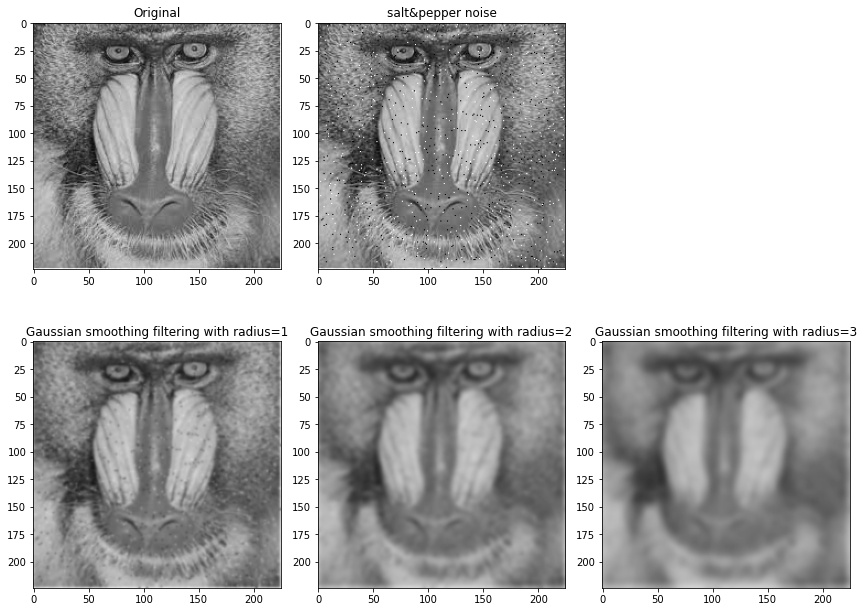

In [5]:
img4 = io.imread('./images/mandrill.jpg')
img4 = color.rgb2gray(img4)
img4 = img_as_float(img4)

# Add salt and pepper noise and convert to PIL object
img4_sp = util.random_noise(img4, mode = 's&p', amount=0.02, salt_vs_pepper=0.5)
img4 = Image.fromarray(img_as_ubyte(img4))
img4_sp = Image.fromarray(img_as_ubyte(img4_sp))

# Gaussian smoothing filtering
img4_blur_1 = img4_sp.filter(ImageFilter.GaussianBlur(radius=1))
img4_blur_2 = img4_sp.filter(ImageFilter.GaussianBlur(radius=2))
img4_blur_3 = img4_sp.filter(ImageFilter.GaussianBlur(radius=3))

# Plot
plt.figure(figsize=[12, 9])
plt.subplot(2, 3, 1)
plt.imshow(img4, vmin=0, vmax=255, cmap='gray')
plt.title('Original')
plt.subplot(2, 3, 2)
plt.imshow(img4_sp, vmin=0, vmax=255, cmap='gray')
plt.title('salt&pepper noise')
plt.subplot(2, 3, 4)
plt.imshow(img4_blur_1, vmin=0, vmax=255, cmap='gray')
plt.title('Gaussian smoothing filtering with radius=1')
plt.subplot(2, 3, 5)
plt.imshow(img4_blur_2, vmin=0, vmax=255, cmap='gray')
plt.title('Gaussian smoothing filtering with radius=2')
plt.subplot(2, 3, 6)
plt.imshow(img4_blur_3, vmin=0, vmax=255, cmap='gray')
plt.title('Gaussian smoothing filtering with radius=3')
plt.tight_layout()
plt.show()

### (6) Median Filtering.	
(a) Load the image 'mandrill.jpg'. 

(b) Add salt&Pepper noise with different intensities (at least 3 kinds). (Tips: ``skimage.util.random_noise``) 

(c) Perform median filtering to smooth these noised images respectively. Select kernels with different radius parameter values (at least 3 kinds). (Tips: ``ImageFilter.MedianFilter``) 

(d) Display the images in the same figure with sub-figures. Add the corresponding title to the sub-figure.

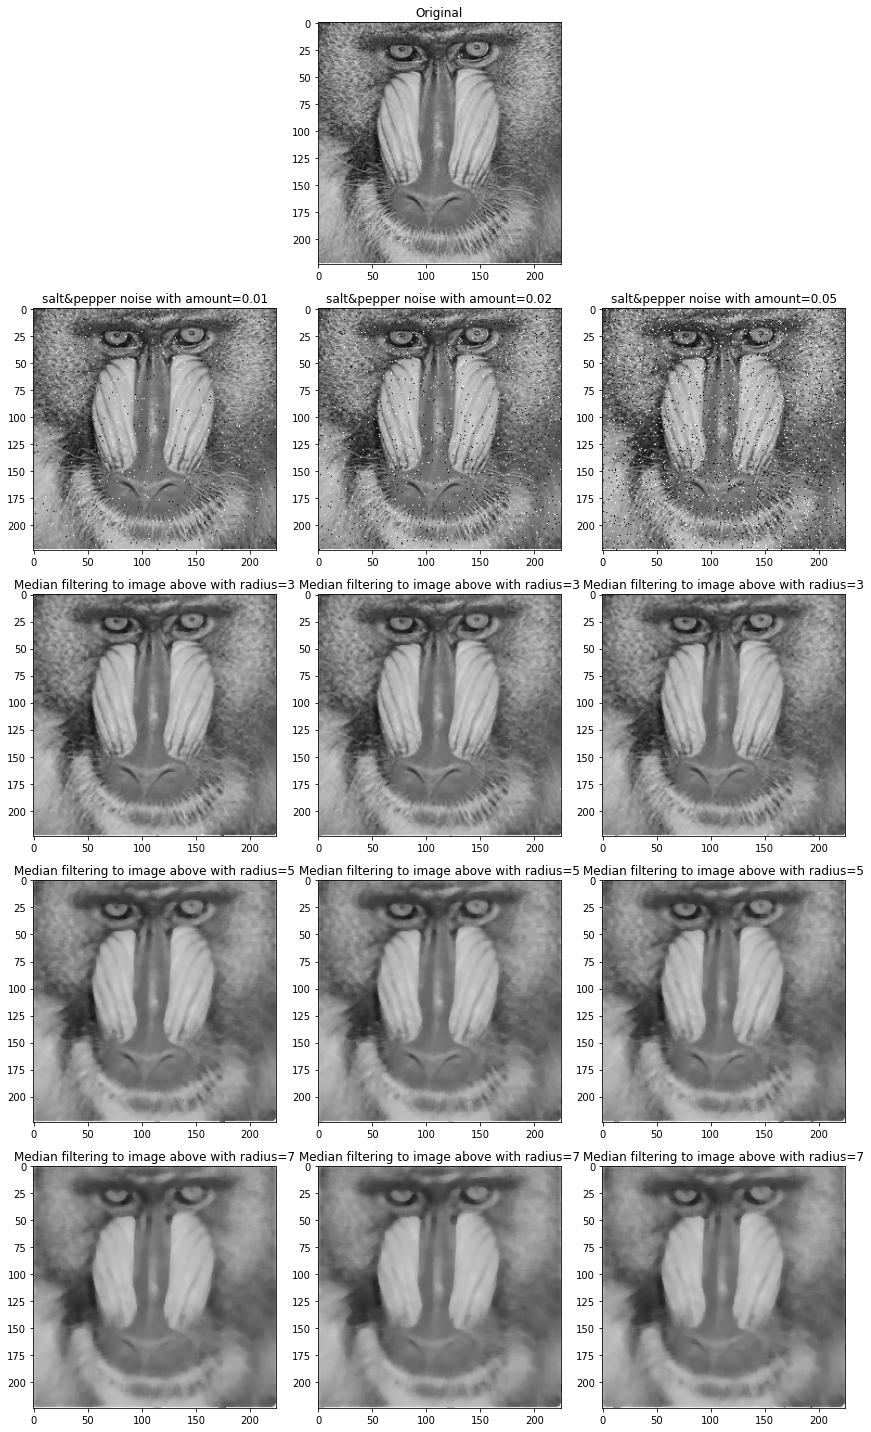

In [6]:
img5 = io.imread('./images/mandrill.jpg')
img5 = color.rgb2gray(img5)
img5 = img_as_float(img5)

# Add salt and pepper noise and convert to PIL object
img5_sp_1 = util.random_noise(img5, mode = 's&p', amount=0.01, salt_vs_pepper=0.5)
img5_sp_2 = util.random_noise(img5, mode = 's&p', amount=0.02, salt_vs_pepper=0.5)
img5_sp_3 = util.random_noise(img5, mode = 's&p', amount=0.05, salt_vs_pepper=0.5)
img5 = Image.fromarray(img_as_ubyte(img5))
img5_sp_1 = Image.fromarray(img_as_ubyte(img5_sp_1))
img5_sp_2 = Image.fromarray(img_as_ubyte(img5_sp_2))
img5_sp_3 = Image.fromarray(img_as_ubyte(img5_sp_3))

# Median filtering
img5_blur_1_1 = img5_sp_1.filter(ImageFilter.MedianFilter(3))
img5_blur_1_2 = img5_sp_1.filter(ImageFilter.MedianFilter(5))
img5_blur_1_3 = img5_sp_1.filter(ImageFilter.MedianFilter(7))
img5_blur_2_1 = img5_sp_2.filter(ImageFilter.MedianFilter(3))
img5_blur_2_2 = img5_sp_2.filter(ImageFilter.MedianFilter(5))
img5_blur_2_3 = img5_sp_2.filter(ImageFilter.MedianFilter(7))
img5_blur_3_1 = img5_sp_3.filter(ImageFilter.MedianFilter(3))
img5_blur_3_2 = img5_sp_3.filter(ImageFilter.MedianFilter(5))
img5_blur_3_3 = img5_sp_3.filter(ImageFilter.MedianFilter(7))

# Plot
plt.figure(figsize=[12, 20])
plt.subplot(5, 3, 2)
plt.imshow(img5, vmin=0, vmax=255, cmap='gray')
plt.title('Original')
plt.subplot(5, 3, 4)
plt.imshow(img5_sp_1, vmin=0, vmax=255, cmap='gray')
plt.title('salt&pepper noise with amount=0.01')
plt.subplot(5, 3, 5)
plt.imshow(img5_sp_2, vmin=0, vmax=255, cmap='gray')
plt.title('salt&pepper noise with amount=0.02')
plt.subplot(5, 3, 6)
plt.imshow(img5_sp_3, vmin=0, vmax=255, cmap='gray')
plt.title('salt&pepper noise with amount=0.05')
plt.subplot(5, 3, 7)
plt.imshow(img5_blur_1_1, vmin=0, vmax=255, cmap='gray')
plt.title('Median filtering to image above with radius=3')
plt.subplot(5, 3, 8)
plt.imshow(img5_blur_2_1, vmin=0, vmax=255, cmap='gray')
plt.title('Median filtering to image above with radius=3')
plt.subplot(5, 3, 9)
plt.imshow(img5_blur_3_1, vmin=0, vmax=255, cmap='gray')
plt.title('Median filtering to image above with radius=3')
plt.subplot(5, 3, 10)
plt.imshow(img5_blur_1_2, vmin=0, vmax=255, cmap='gray')
plt.title('Median filtering to image above with radius=5')
plt.subplot(5, 3, 11)
plt.imshow(img5_blur_2_2, vmin=0, vmax=255, cmap='gray')
plt.title('Median filtering to image above with radius=5')
plt.subplot(5, 3, 12)
plt.imshow(img5_blur_3_2, vmin=0, vmax=255, cmap='gray')
plt.title('Median filtering to image above with radius=5')
plt.subplot(5, 3, 13)
plt.imshow(img5_blur_1_3, vmin=0, vmax=255, cmap='gray')
plt.title('Median filtering to image above with radius=7')
plt.subplot(5, 3, 14)
plt.imshow(img5_blur_2_3, vmin=0, vmax=255, cmap='gray')
plt.title('Median filtering to image above with radius=7')
plt.subplot(5, 3, 15)
plt.imshow(img5_blur_3_3, vmin=0, vmax=255, cmap='gray')
plt.title('Median filtering to image above with radius=7')
plt.tight_layout()
plt.show()

### (7)	 Sharpening Filtering.	 
(a) Load the image 'lena.jpg', convert it to grayscale. 

(b) Perform sharpening spatial filtering to enhance the image with different parameters (at least 3 kinds). (Tips: ``skimage.filters.laplace``)

(c) Display the images in the same figure with sub-figures. Add the corresponding title to the sub-figure.

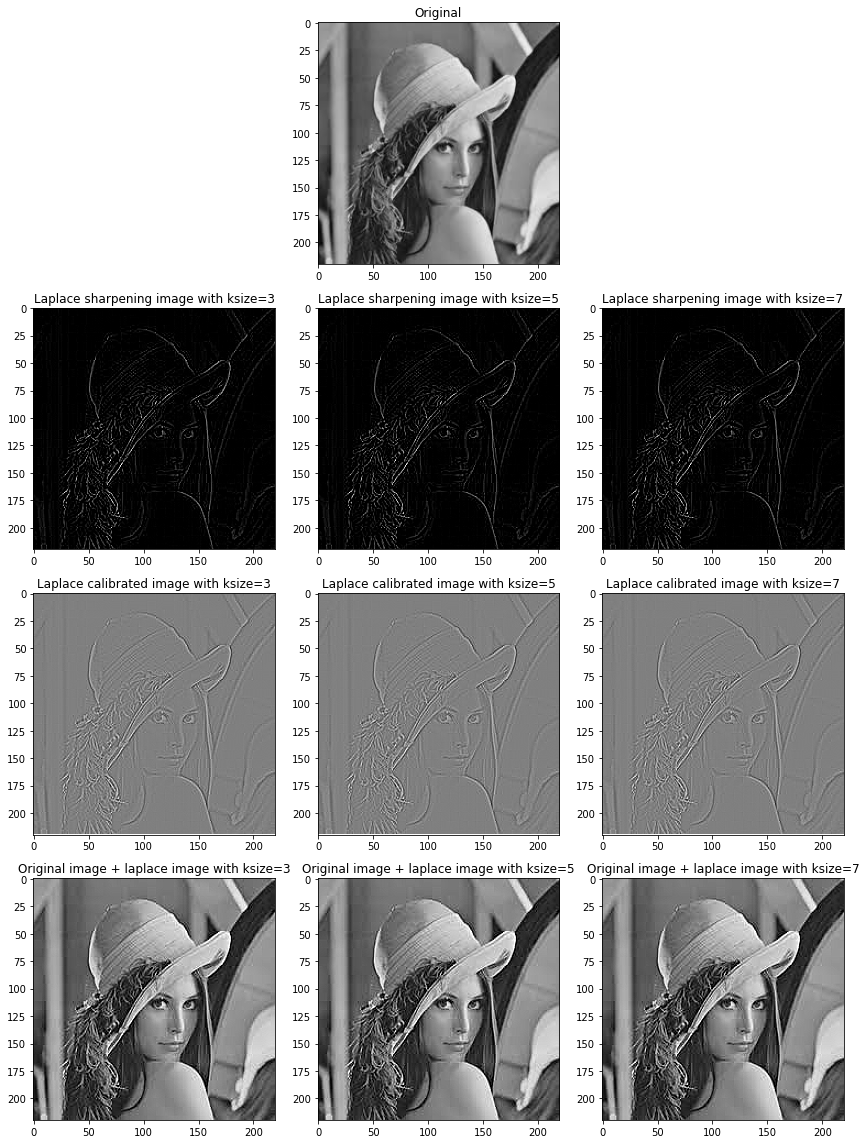

In [18]:
from skimage import filters

img6 = io.imread('./images/lena.jpg')
img6 = color.rgb2gray(img6)

# Laplace sharpening
img6_lap_1 = filters.laplace(img6, ksize=3)
img6_lap_2 = filters.laplace(img6, ksize=5)
img6_lap_3 = filters.laplace(img6, ksize=7)

plt.figure(figsize=[12, 16])
plt.subplot(4, 3, 2)
plt.imshow(img6, cmap='gray')
plt.title('Original')

# Laplace image
plt.subplot(4, 3, 4)
plt.imshow(img6_lap_1, vmin=0, vmax=1, cmap='gray')
plt.title('Laplace sharpening image with ksize=3')
plt.subplot(4, 3, 5)
plt.imshow(img6_lap_2, vmin=0, vmax=1, cmap='gray')
plt.title('Laplace sharpening image with ksize=5')
plt.subplot(4, 3, 6)
plt.imshow(img6_lap_3, vmin=0, vmax=1, cmap='gray')
plt.title('Laplace sharpening image with ksize=7')

# Laplace calibrated image
plt.subplot(4, 3, 7)
plt.imshow(img6_lap_1, vmin=-1, vmax=1, cmap='gray')
plt.title('Laplace calibrated image with ksize=3')
plt.subplot(4, 3, 8)
plt.imshow(img6_lap_2, vmin=-1, vmax=1, cmap='gray')
plt.title('Laplace calibrated image with ksize=5')
plt.subplot(4, 3, 9)
plt.imshow(img6_lap_3, vmin=-1, vmax=1, cmap='gray')
plt.title('Laplace calibrated image with ksize=7')

# Add laplace image to original image
plt.subplot(4, 3, 10)
plt.imshow(img6+0.5*img6_lap_1, vmin=0, vmax=1, cmap='gray')
plt.title('Original image + laplace image with ksize=3')
plt.subplot(4, 3, 11)
plt.imshow(img6+0.5*img6_lap_2, vmin=0, vmax=1, cmap='gray')
plt.title('Original image + laplace image with ksize=5')
plt.subplot(4, 3, 12)
plt.imshow(img6+0.5*img6_lap_3, vmin=0, vmax=1, cmap='gray')
plt.title('Original image + laplace image with ksize=7')
plt.tight_layout()
plt.show()

### (8)	Face Detection and Processing with OpenCV. (``Bonus Practice``)
Load the image 'exp2_7.jpg'. 

(a) The face region is detected and marked with a <font style="color:green;">green</font></center> rectangle.(Tips: You may use``cv2.CascadeClassifier``, or ``cv2.dnn.readNetFromCaffe``, or [``MTCNN``](https://github.com/timesler/facenet-pytorch))

(b) Perform Gaussian smoothing filtering for the background region. Some examples of the generated results are shown in the figure below.
 
![result1](./images/exp2_7_1.png) 
<center><font style="color:red;">** Figure 1. The result of cv2.CascadeClassifier ** </font></center>

![result2](./images/exp2_7_2.png) 
<center><font style="color:red;">** Figure 2. The result of cv2.dnn.readNetFromCaffe ** </font></center>

![result3](./images/exp2_7_3.png) 
<center><font style="color:red;">** Figure 3. The result of MTCNN ** </font></center>

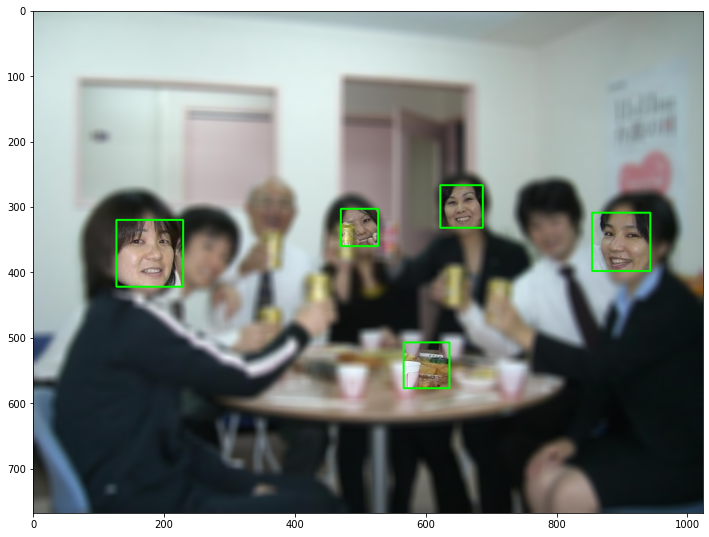

In [56]:
import cv2

# Load image and convert to grayscale
img7 = io.imread('./images/exp2_7.jpg')
img7_gray = cv2.cvtColor(img7, cv2.COLOR_RGB2GRAY)

# Load the cascade
face_cascade = cv2.CascadeClassifier('./haarcascade/haarcascade_frontalface_default.xml')

# Detect faces
faces = face_cascade.detectMultiScale(img7_gray, scaleFactor=1.1, minNeighbors=6)

# Background region smoothing and draw the rectangle around each face
img7_gau = cv2.GaussianBlur(img7, (15,15), 10)
img7_gau = img_as_ubyte(img7_gau)
for (x, y, w, h) in faces:
    face_roi = img7[y:y+h, x:x+w, :]
    img7_gau[y:y+h, x:x+w, :] = face_roi
    cv2.rectangle(img7_gau, (x, y), (x+w, y+h), color=(0, 255, 0), thickness=2)
    
plt.figure(figsize=[12, 12])
plt.imshow(img7_gau, vmin=0, vmax=255)
plt.show()

### (9)	Face Detection with Laptop Camera. (``Bonus Practice``)
(a) Load video stream from the laptop camera.

(b) Use a face detection model to detect images captured by the camera.

(c) Mark the face region with a <font style="color:green;">green</font></center> rectangle to achieve real-time detection as good as possible.

(d) Perform Gaussian smoothing filtering for the background region.

In [59]:
# Enabling the camera
cap = cv2.VideoCapture(0)
cv2.namedWindow('camera',flags=cv2.WINDOW_NORMAL | cv2.WINDOW_KEEPRATIO | cv2.WINDOW_GUI_EXPANDED)

# Check the camera
if not cap.isOpened():
    print('\nFailed to enable the camera!\nSomething wrong with your camera!')
    sys.exit()

# Begin capturing
while True:
    # Load the captured image continuously
    ret, frame = cap.read()
    # Check the frame
    if not ret:
        print('\nFailed to capture!\nSomething wrong with your camera!')
        sys.exit()
        
    # Convert to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)

    # Load the cascade
    face_cascade = cv2.CascadeClassifier('./haarcascade/haarcascade_frontalface_default.xml')

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=6)

    # Background region smoothing and draw the rectangle around each face
    gau = cv2.GaussianBlur(frame, (15,15), 10)
    gau = img_as_ubyte(gau)
    for (x, y, w, h) in faces:
        face_roi = frame[y:y+h, x:x+w, :]
        gau[y:y+h, x:x+w, :] = face_roi
        cv2.rectangle(gau, (x, y), (x+w, y+h), color=(0, 255, 0), thickness=2)
    
    # Display on the screen
    cv2.imshow('camera', gau)
    
    # Wait for 1 ms
    key = cv2.waitKey(1)
    # Press Esc (27 in ASCII) to end
    if key == 27:
        break
    
# End capturing
cap.release()
cv2.destroyAllWindows()

## 3.	Requirements of Experiment Report ##
#### (1) Use the Jupyter Notebook to write and test codes. 
#### (2) Display the results in the Jupyter Notebook.
#### (3) Sumbit the report according to the template including the corresponding codes and results. 
#### (4) The report is required to be tidy with clear procedures.
#### (5) The codes should be concise and give some necessary comments.